<a href="https://colab.research.google.com/github/amanullahquamer/Machine-Learning-1/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [2]:
data={
    'Student_ID':[1,2,3,4,5,6,7,8,9,10],
    'Attendence':[90,85,np.nan,70,65,80,99,np.nan,60,88],
   'Test_Score':[78,85,82,np.nan,70,80,95,92,68,88],
    'Participation':['High','Medium','High','Low','Low','Medium','High','High','Low','Medium'],
    'Final_Grade':['Pass','Pass','Pass','Fail','Fail','Pass','Pass','Pass','Fail','Pass']
}

In [3]:
df=pd.DataFrame(data)

In [4]:
print("Original Dataset:")
print(df)

Original Dataset:
   Student_ID  Attendence  Test_Score Participation Final_Grade
0           1        90.0        78.0          High        Pass
1           2        85.0        85.0        Medium        Pass
2           3         NaN        82.0          High        Pass
3           4        70.0         NaN           Low        Fail
4           5        65.0        70.0           Low        Fail
5           6        80.0        80.0        Medium        Pass
6           7        99.0        95.0          High        Pass
7           8         NaN        92.0          High        Pass
8           9        60.0        68.0           Low        Fail
9          10        88.0        88.0        Medium        Pass


In [7]:
imputer=SimpleImputer(strategy='mean')
df[['Attendence','Test_Score']]=imputer.fit_transform(df[['Attendence','Test_Score']])

In [8]:
df=df.drop_duplicates()

In [9]:
print("\nDataset After Cleaning:")
print(df)


Dataset After Cleaning:
   Student_ID  Attendence  Test_Score Participation Final_Grade
0           1      90.000        78.0          High        Pass
1           2      85.000        85.0        Medium        Pass
2           3      79.625        82.0          High        Pass
3           4      70.000        82.0           Low        Fail
4           5      65.000        70.0           Low        Fail
5           6      80.000        80.0        Medium        Pass
6           7      99.000        95.0          High        Pass
7           8      79.625        92.0          High        Pass
8           9      60.000        68.0           Low        Fail
9          10      88.000        88.0        Medium        Pass


In [11]:
scaler=MinMaxScaler()
df[['Attendence','Test_Score']]=scaler.fit_transform(df[['Attendence','Test_Score']])




In [12]:
encoder=LabelEncoder()
df['Participation']=encoder.fit_transform(df['Participation'])
df['Final_Grade']=encoder.fit_transform(df['Final_Grade'])

print("\nDataset After Preprocessing:")
print(df)


Dataset After Preprocessing:
   Student_ID  Attendence  Test_Score  Participation  Final_Grade
0           1    0.769231    0.370370              0            1
1           2    0.641026    0.629630              2            1
2           3    0.503205    0.518519              0            1
3           4    0.256410    0.518519              1            0
4           5    0.128205    0.074074              1            0
5           6    0.512821    0.444444              2            1
6           7    1.000000    1.000000              0            1
7           8    0.503205    0.888889              0            1
8           9    0.000000    0.000000              1            0
9          10    0.717949    0.740741              2            1


In [13]:
X=df[['Attendence','Test_Score','Participation']]
Y=df['Final_Grade']


In [14]:
selector=SelectKBest(score_func=f_classif,k=2)
X_new=selector.fit_transform(X,Y)


In [15]:
selected_features=X.columns[selector.get_support()]
print("\nSelected Features :", list(selected_features))



Selected Features : ['Attendence', 'Test_Score']


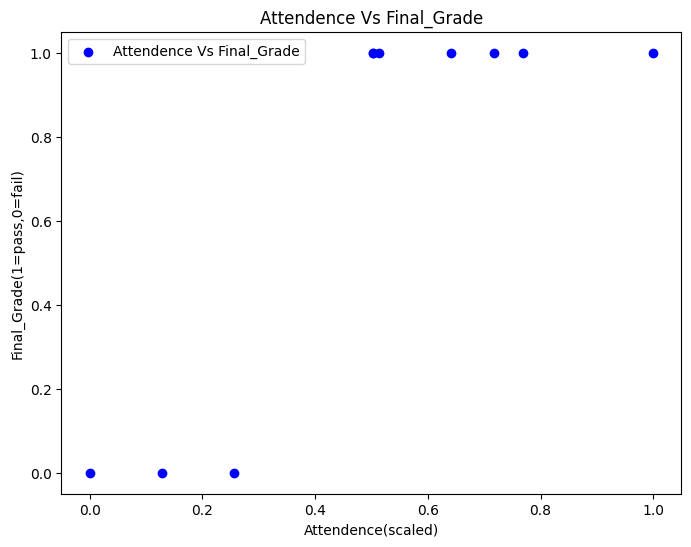

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df['Attendence'],df['Final_Grade'],color='blue',label='Attendence Vs Final_Grade')
plt.title("Attendence Vs Final_Grade")
plt.xlabel("Attendence(scaled)")
plt.ylabel("Final_Grade(1=pass,0=fail)")
plt.legend()
plt.show()


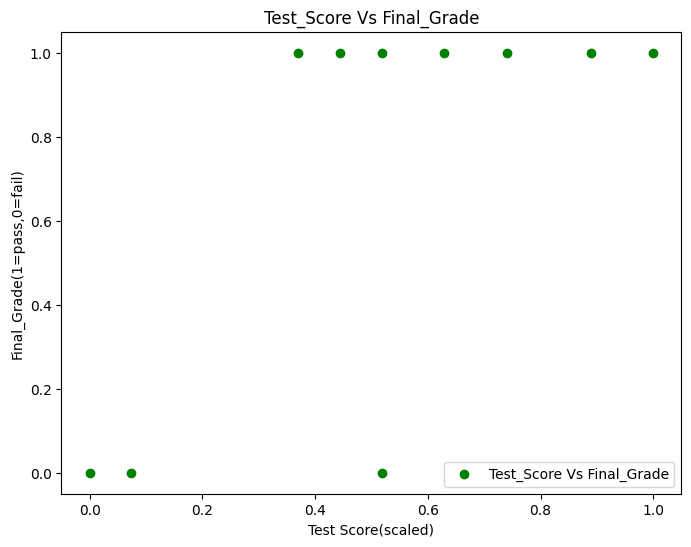

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df['Test_Score'],df['Final_Grade'],color='green',label='Test_Score Vs Final_Grade')
plt.title("Test_Score Vs Final_Grade")
plt.xlabel("Test Score(scaled)")
plt.ylabel("Final_Grade(1=pass,0=fail)")
plt.legend()
plt.show()


In [18]:
print("\nProcessed Dataset Ready for Model Training:")
print(df)


Processed Dataset Ready for Model Training:
   Student_ID  Attendence  Test_Score  Participation  Final_Grade
0           1    0.769231    0.370370              0            1
1           2    0.641026    0.629630              2            1
2           3    0.503205    0.518519              0            1
3           4    0.256410    0.518519              1            0
4           5    0.128205    0.074074              1            0
5           6    0.512821    0.444444              2            1
6           7    1.000000    1.000000              0            1
7           8    0.503205    0.888889              0            1
8           9    0.000000    0.000000              1            0
9          10    0.717949    0.740741              2            1


In [21]:
import seaborn as sns
import pandas as pd


titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
titanic.info()
titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [24]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


<ipython-input-24-1d8fbee82240>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


In [25]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)


<ipython-input-25-45c775f883ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [26]:
titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)


<ipython-input-26-94a2c3e83b6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)


In [27]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [28]:
titanic.dropna(subset=['embarked'], inplace=True)

In [29]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


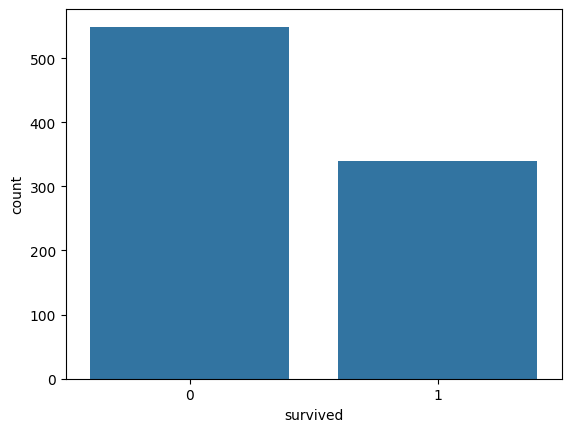

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='survived', data=titanic)
plt.show()
